In [33]:
import numpy as np
import pandas as pd
import datetime as dt
import scipy as sp
import statsmodels.api as sm
import statsmodels.formula.api as smf
import statsmodels.stats.api as sms 
import sklearn as sk

from patsy import dmatrix

import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

%matplotlib inline
%config InlineBackend.figure_formats = {'png', 'retina'}

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

import platform
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)

In [34]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [63]:
test = pd.read_csv("test.csv")

### train data와 test data의 기본적인 정보들

In [35]:
print(train.shape)
train.tail()

(647054, 7)


,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
647049,39,191346,Sunday,3.239000e+10,1,PHARMACY OTC,1118.0
647050,39,191346,Sunday,7.874205e+09,1,FROZEN FOODS,1752.0
647051,39,191346,Sunday,4.072000e+03,1,PRODUCE,4170.0
647052,8,191347,Sunday,4.190008e+09,1,DAIRY,1512.0
647053,8,191347,Sunday,3.800060e+09,1,GROCERY DRY GOODS,3600.0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647054 entries, 0 to 647053
Data columns (total 7 columns):
TripType                 647054 non-null int64
VisitNumber              647054 non-null int64
Weekday                  647054 non-null object
Upc                      642925 non-null float64
ScanCount                647054 non-null int64
DepartmentDescription    645693 non-null object
FinelineNumber           642925 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 34.6+ MB


In [5]:
train.describe()

,TripType,VisitNumber,Upc,ScanCount,FinelineNumber
count,647054.000000,647054.000000,6.429250e+05,647054.000000,642925.000000
mean,58.584511,96167.640078,3.060698e+10,1.108878,3726.884567
std,157.635533,55545.485154,9.120134e+10,0.700776,2780.966158
min,3.000000,5.000000,8.340000e+02,-12.000000,0.000000
25%,27.000000,49268.000000,3.400001e+09,1.000000,1404.000000
50%,39.000000,97074.000000,7.050103e+09,1.000000,3352.000000
75%,40.000000,144316.000000,3.006531e+10,1.000000,5501.000000
max,999.000000,191347.000000,9.789707e+11,71.000000,9998.000000


In [6]:
print(test.shape)
test.tail()

(653646, 6)


,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
653641,191348,Sunday,6.657211e+10,1,BATH AND SHOWER,1505.0
653642,191348,Sunday,8.818139e+10,1,BATH AND SHOWER,1099.0
653643,191348,Sunday,4.282557e+09,1,MENS WEAR,8220.0
653644,191348,Sunday,8.046919e+10,1,SWIMWEAR/OUTERWEAR,114.0
653645,191348,Sunday,7.871536e+09,1,MENS WEAR,4923.0


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 653646 entries, 0 to 653645
Data columns (total 6 columns):
VisitNumber              653646 non-null int64
Weekday                  653646 non-null object
Upc                      649660 non-null float64
ScanCount                653646 non-null int64
DepartmentDescription    652318 non-null object
FinelineNumber           649660 non-null float64
dtypes: float64(2), int64(2), object(2)
memory usage: 29.9+ MB


In [8]:
test.describe()

,VisitNumber,Upc,ScanCount,FinelineNumber
count,653646.000000,6.496600e+05,653646.000000,649660.000000
mean,97040.992661,3.054325e+10,1.108726,3725.241185
std,55575.161962,9.125453e+10,0.712841,2776.625808
min,1.000000,8.340000e+02,-21.000000,0.000000
25%,49689.000000,3.400001e+09,1.000000,1404.000000
50%,98219.000000,7.047049e+09,1.000000,3353.000000
75%,145271.000000,3.004167e+10,1.000000,5501.000000
max,191348.000000,9.789707e+11,55.000000,9999.000000


C:\Users\LG\Anaconda3\lib\site-packages\numpy\lib\function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
C:\Users\LG\Anaconda3\lib\site-packages\numpy\lib\function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


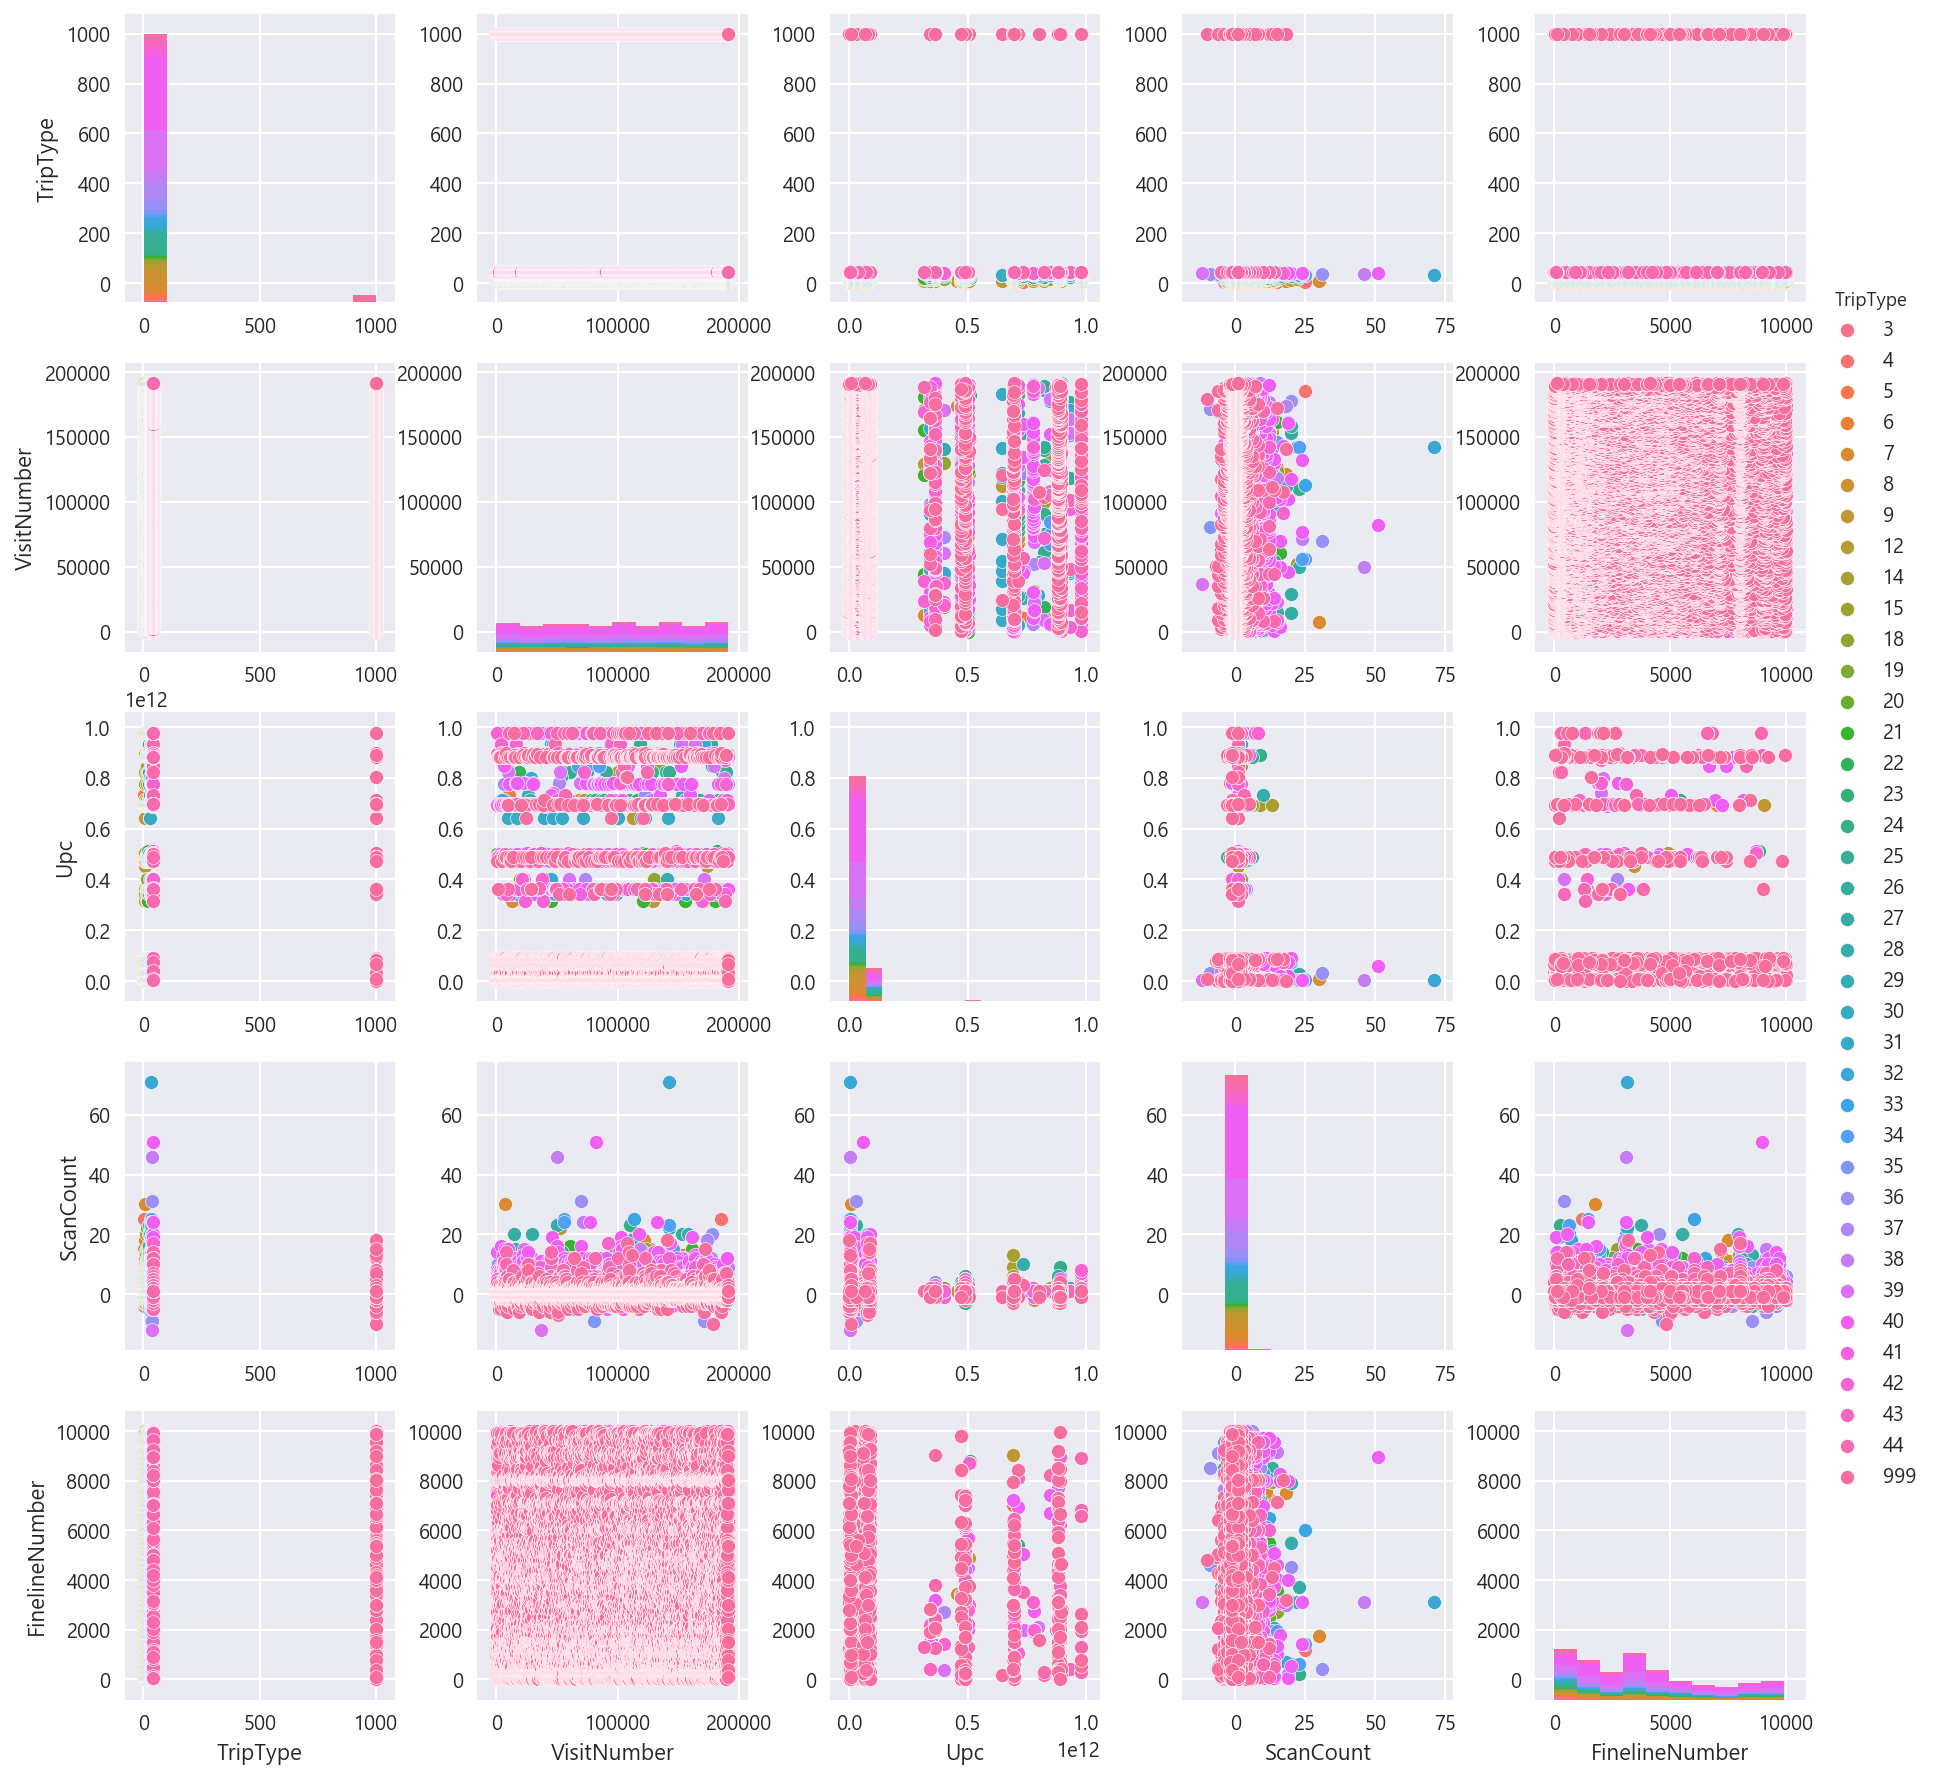

In [12]:
sns.pairplot(train, hue="TripType")
plt.show()

In [9]:
train.tail()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
647049,39,191346,Sunday,3.239000e+10,1,PHARMACY OTC,1118.0
647050,39,191346,Sunday,7.874205e+09,1,FROZEN FOODS,1752.0
647051,39,191346,Sunday,4.072000e+03,1,PRODUCE,4170.0
647052,8,191347,Sunday,4.190008e+09,1,DAIRY,1512.0
647053,8,191347,Sunday,3.800060e+09,1,GROCERY DRY GOODS,3600.0


In [10]:
train_not_999 = train[train["TripType"] != 999]

In [11]:
print(train_not_999.shape)
print(train.shape)

(629464, 7)
(647054, 7)


C:\Users\LG\Anaconda3\lib\site-packages\numpy\lib\function_base.py:748: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= mn)
C:\Users\LG\Anaconda3\lib\site-packages\numpy\lib\function_base.py:749: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= mx)


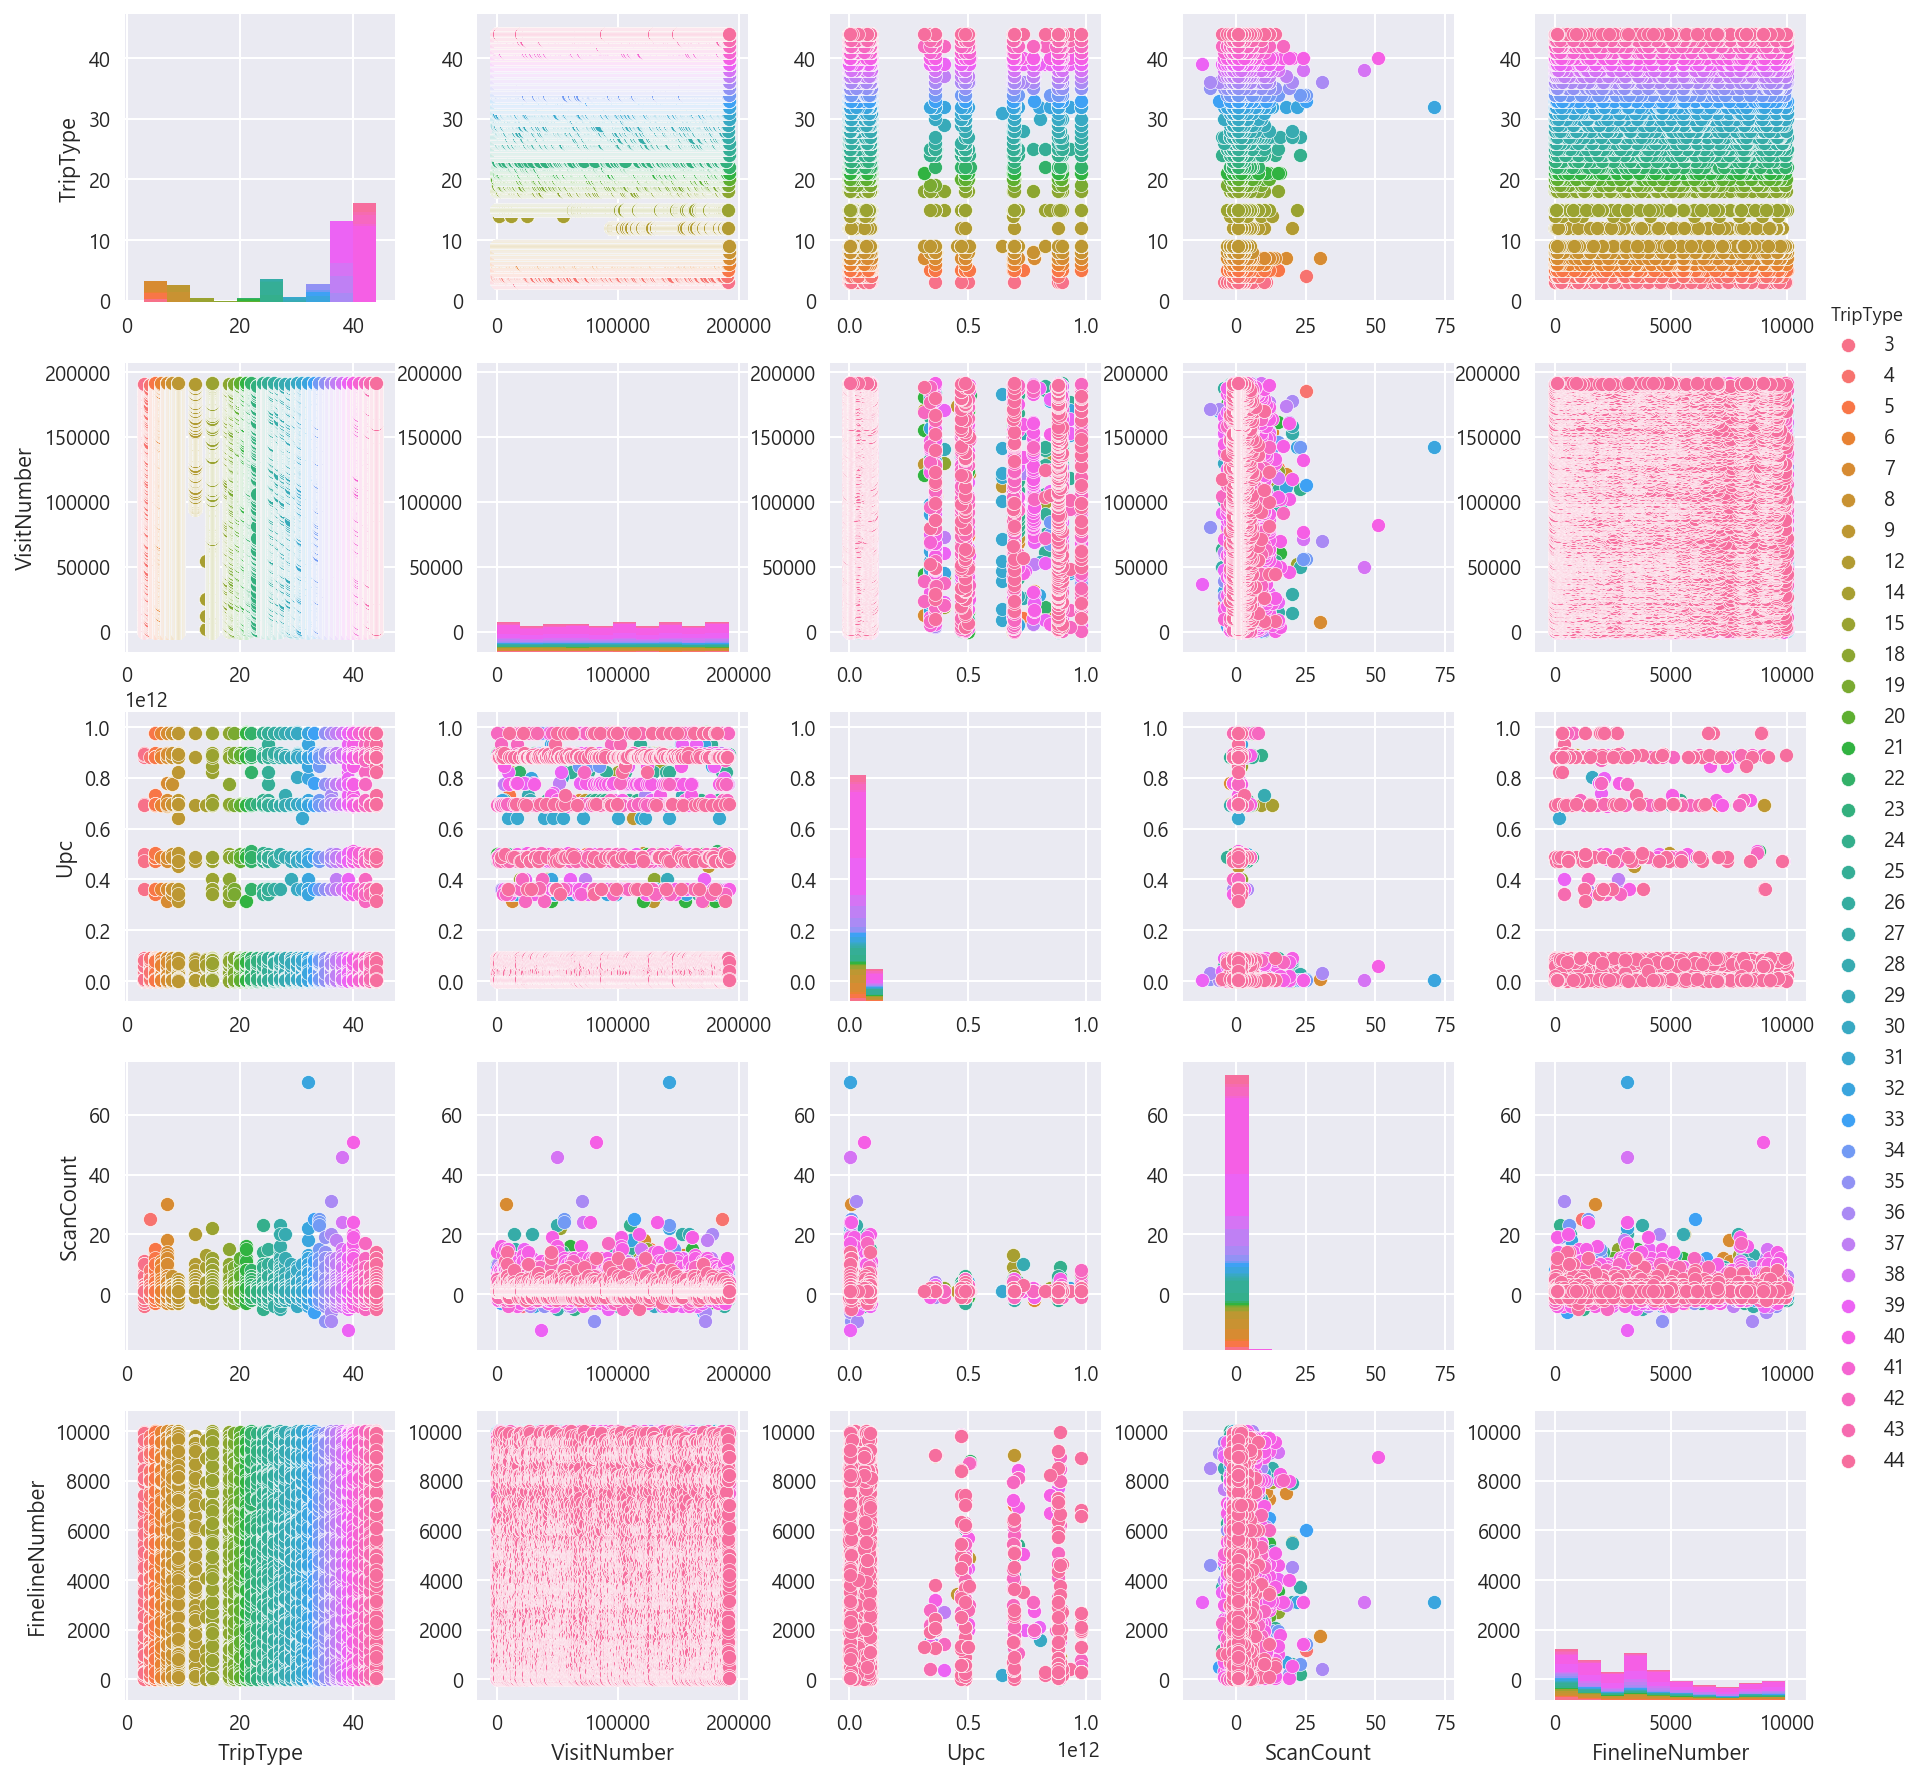

In [21]:
sns.pairplot(train_not_999, hue="TripType")
plt.show()

In [70]:
train["Count"] = 1
train.tail()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,Count
647049,39,191346,6,3.239000e+10,1,PHARMACY OTC,1118.0,1
647050,39,191346,6,7.874205e+09,1,FROZEN FOODS,1752.0,1
647051,39,191346,6,4.072000e+03,1,PRODUCE,4170.0,1
647052,8,191347,6,4.190008e+09,1,DAIRY,1512.0,1
647053,8,191347,6,3.800060e+09,1,GROCERY DRY GOODS,3600.0,1


### Weekday

In [41]:
print("Weekday에는 {}가 있습니다".format(train["Weekday"].unique()))

Weekday에는 ['Friday' 'Saturday' 'Sunday' 'Monday' 'Tuesday' 'Wednesday' 'Thursday']가 있습니다


<function matplotlib.pyplot.show>

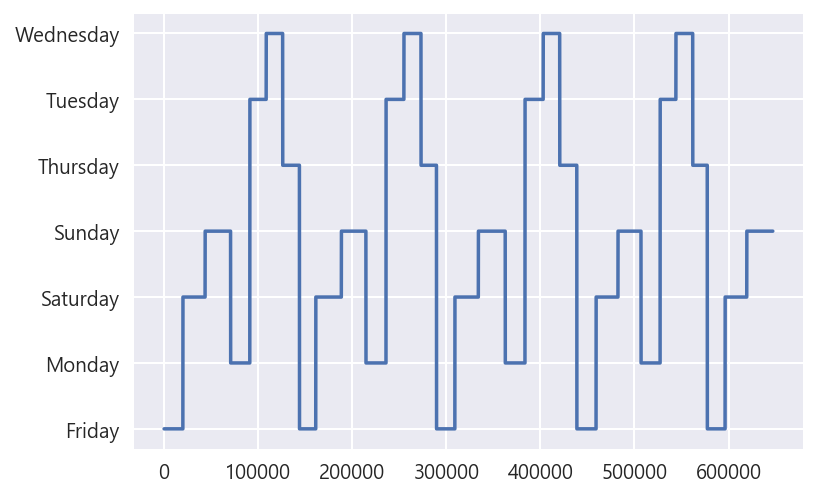

In [44]:
plt.plot(train["Weekday"])
plt.show

<function matplotlib.pyplot.show>

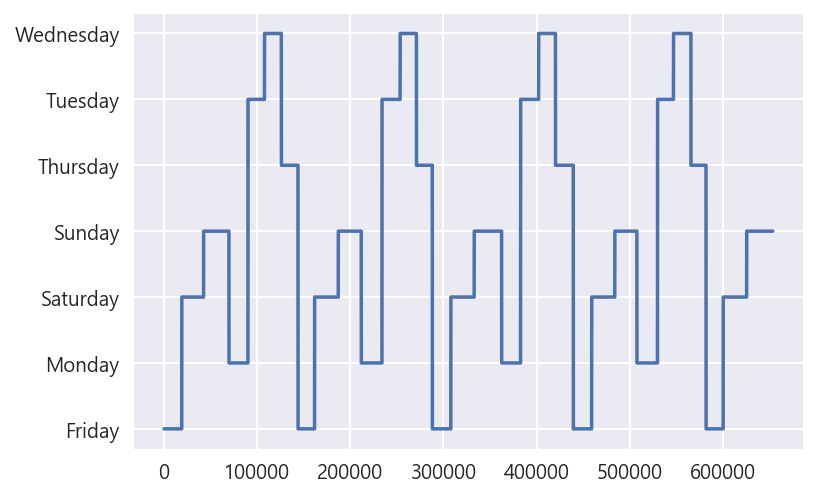

In [43]:
plt.plot(test["Weekday"])
plt.show

In [45]:
for i in range(0, 647054):
    if train.iat[i, 2] == "Monday":
        train.iat[i, 2] = 0       
    elif train.iat[i, 2] == "Tuesday":
        train.iat[i, 2] = 1       
    elif train.iat[i, 2] == "Wednesday":
        train.iat[i, 2] = 2       
    elif train.iat[i, 2] == "Thursday":
        train.iat[i, 2] = 3       
    elif train.iat[i, 2] == "Friday":
        train.iat[i, 2] = 4       
    elif train.iat[i, 2] == "Saturday":
        train.iat[i, 2] = 5       
    else:
        train.iat[i, 2] = 6 

In [64]:
for i in range(0, 653646):
    if test.iat[i, 1] == "Monday":
        test.iat[i, 1] = 0       
    elif test.iat[i, 1] == "Tuesday":
        test.iat[i, 1] = 1       
    elif test.iat[i, 1] == "Wednesday":
        test.iat[i, 1] = 2       
    elif test.iat[i, 1] == "Thursday":
        test.iat[i, 1] = 3       
    elif test.iat[i, 1] == "Friday":
        test.iat[i, 1] = 4       
    elif test.iat[i, 1] == "Saturday":
        test.iat[i, 1] = 5       
    else:
        test.iat[i, 1] = 6 

<function matplotlib.pyplot.show>

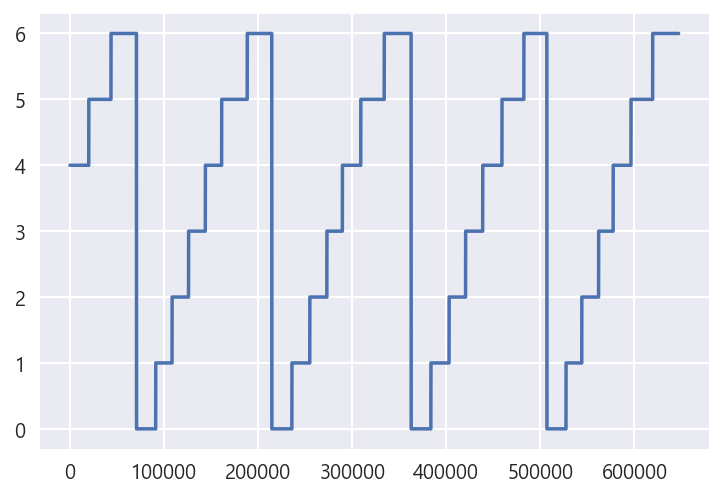

In [47]:
plt.plot(train["Weekday"])
plt.show

<function matplotlib.pyplot.show>

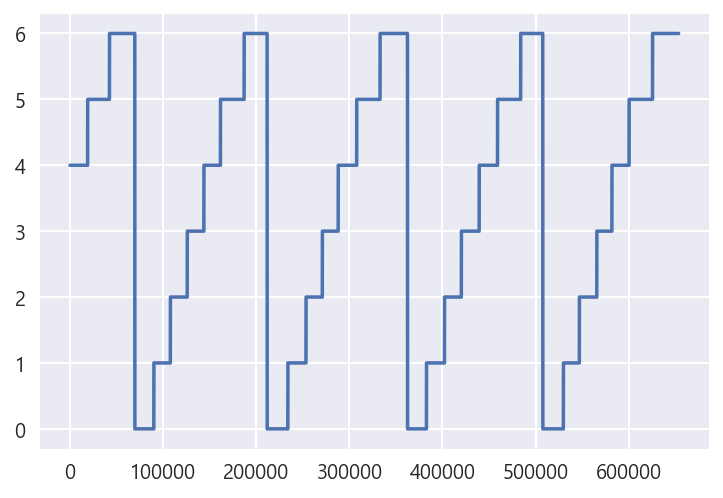

In [65]:
plt.plot(test["Weekday"])
plt.show

- 한달(31일)의 data가 시간순대로 기록되어 있는것처럼 보임

In [71]:
train.tail()

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,Count
647049,39,191346,6,3.239000e+10,1,PHARMACY OTC,1118.0,1
647050,39,191346,6,7.874205e+09,1,FROZEN FOODS,1752.0,1
647051,39,191346,6,4.072000e+03,1,PRODUCE,4170.0,1
647052,8,191347,6,4.190008e+09,1,DAIRY,1512.0,1
647053,8,191347,6,3.800060e+09,1,GROCERY DRY GOODS,3600.0,1


### TripType
- TripType은 int64이며, 각각가 어떤 trip type을 말하는지에 대한 설명은 없음
- TripType은 38개가 있음

In [15]:
print("TripType은 {}개가 있습니다.".format(len(train["TripType"].unique())))

TripType은 38개가 있습니다.


### VisitNumber

In [24]:
print("VisitNumber는 {}개가 있습니다.".format(len(train["VisitNumber"].unique())))

VisitNumber는 95674개가 있습니다.


### DepartmentDescription
- train data에는 69개, test data에는 68개가 있음
- test data에는 업소 train data에만 있는 DepartmentDescription : 'HEALTH AND BEAUTY AIDS'

In [10]:
set(train["DepartmentDescription"])

{'FINANCIAL SERVICES',
 nan,
 'ELECTRONICS',
 'SWIMWEAR/OUTERWEAR',
 'SEAFOOD',
 'WIRELESS',
 'FROZEN FOODS',
 'HOUSEHOLD CHEMICALS/SUPP',
 'CONCEPT STORES',
 'SERVICE DELI',
 'PERSONAL CARE',
 'ACCESSORIES',
 'COOK AND DINE',
 'LAWN AND GARDEN',
 'MEDIA AND GAMING',
 'OTHER DEPARTMENTS',
 'INFANT CONSUMABLE HARDLINES',
 'LIQUOR,WINE,BEER',
 'OPTICAL - FRAMES',
 'CANDY, TOBACCO, COOKIES',
 'LARGE HOUSEHOLD GOODS',
 'HOME MANAGEMENT',
 'MENS WEAR',
 'PRE PACKED DELI',
 'HEALTH AND BEAUTY AIDS',
 'BEAUTY',
 'TOYS',
 'OFFICE SUPPLIES',
 'AUTOMOTIVE',
 'GIRLS WEAR, 4-6X  AND 7-14',
 'LADIESWEAR',
 'CAMERAS AND SUPPLIES',
 'SLEEPWEAR/FOUNDATIONS',
 'HOME DECOR',
 'BOYS WEAR',
 'PHARMACY RX',
 'COMM BREAD',
 'FURNITURE',
 'HARDWARE',
 'IMPULSE MERCHANDISE',
 'PHARMACY OTC',
 'BAKERY',
 'SPORTING GOODS',
 'MEAT - FRESH & FROZEN',
 'JEWELRY AND SUNGLASSES',
 'GROCERY DRY GOODS',
 'PETS AND SUPPLIES',
 'DAIRY',
 'SHOES',
 'SEASONAL',
 'BOOKS AND MAGAZINES',
 'SHEER HOSIERY',
 'HORTICULTURE AND 

In [11]:
len(set(train["DepartmentDescription"]))

69

In [12]:
len(set(test["DepartmentDescription"]))

68

In [13]:
a = set(train["DepartmentDescription"]) - set(test["DepartmentDescription"])

In [14]:
print("{}는 train data에만 있는 DepartmentDescription입니다.".format(a))

{'HEALTH AND BEAUTY AIDS'}는 train data에만 있는 DepartmentDescription입니다.


In [26]:
df1 = train.pivot_table(values="Count", index=["VisitNumber"], columns=["DepartmentDescription"], aggfunc=np.sum, dropna=False)

In [27]:
df1.tail()

DepartmentDescription,1-HR PHOTO,ACCESSORIES,AUTOMOTIVE,BAKERY,BATH AND SHOWER,BEAUTY,BEDDING,BOOKS AND MAGAZINES,BOYS WEAR,BRAS & SHAPEWEAR,...,SEAFOOD,SEASONAL,SERVICE DELI,SHEER HOSIERY,SHOES,SLEEPWEAR/FOUNDATIONS,SPORTING GOODS,SWIMWEAR/OUTERWEAR,TOYS,WIRELESS
VisitNumber,,,,,,,,,,,,,,,,,,,,,
191343,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191344,NaN,NaN,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0
191345,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191346,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
191347,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### FinelineNumber

In [32]:
print("FinelineNumber는 {}개가 있습니다.".format(len(train["FinelineNumber"].unique())))

FinelineNumber는 5196개가 있습니다.


In [31]:
train[train["FinelineNumber"] == 1512]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber,Count
9089,38,3147,4,7.524311e+09,1,DAIRY,1512.0,1
10163,36,3435,4,7.524310e+09,1,DAIRY,1512.0,1
19475,8,6100,4,7.524311e+09,1,DAIRY,1512.0,1
20043,9,6259,5,7.524311e+09,1,DAIRY,1512.0,1
22321,39,7084,5,7.524311e+09,1,DAIRY,1512.0,1
35486,37,10646,5,7.524311e+09,1,DAIRY,1512.0,1
38957,38,11552,5,7.524311e+09,1,DAIRY,1512.0,1
43912,39,13001,6,7.524311e+09,1,DAIRY,1512.0,1
46002,39,13596,6,7.524311e+09,1,DAIRY,1512.0,1
48028,39,14079,6,7.524311e+09,1,DAIRY,1512.0,1


- FinelineNumber가 동일하다고 해서 DepartmentDescription이 동일하지는 않음.